<a href="https://colab.research.google.com/github/KateMorf/icev-notebooks/blob/main/3_Exerc%C3%ADcio_Respondido_S%C3%A1bado_(25_09_2021).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Praticando KDD no Iris dataset**

In [ ]:
!pip install -U pandas-profiling

In [ ]:
import pandas as pd
import pandas_profiling
from sklearn.datasets import load_iris
from pandas_profiling import ProfileReport
import numpy as np

# **Análise Exploratório de Dados**

### Conhecendo o Dataset Iris
### Atributos existentes:
### ---- **sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target**
### Descrição dos atributos:<br>
 **sepal length (cm)**: comprimento sépala<br>
 **sepal width (cm)**: largura sépala<br>
 **petal length (cm)**: comprimento pétala<br>
 **petal width (cm)**: largura pétala<br>
 **target**: classe (0 - setosa, 1 -versicolor, 2 - virginica)<br>

In [ ]:
# lendo arquivo csv com o método read_csv()
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['target'] = df.target.map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

In [ ]:
# retornar os N primeiros elementos do DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
# retornar os N últimos elementos do DataFrame
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [ ]:
# renomear colunas com o método rename() e salvar em um novo dataframe (remover cm do nome dos atributos)
df = df.rename(columns={'sepal length (cm)': 'sepal length',
                   'sepal width (cm)': 'sepal width',
                   'petal length (cm)':	'petal length',
                   'petal width (cm)': 'petal width'})

In [ ]:
# retornar informações sobre os dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Encontrando informações importantes sobre os dados

In [ ]:
# qtd de registros pela classe target
df['target'].value_counts()

Virginica     50
Setosa        50
Versicolor    50
Name: target, dtype: int64

In [ ]:
# Média de tamanho da petal length e sepal length por target
df.groupby(['target']).mean()[["petal length", "sepal length"]]

,petal length,sepal length
target,,
Setosa,1.462,5.006
Versicolor,4.260,5.936
Virginica,5.552,6.588


### Módulo pandas_profiling

In [ ]:
# gerando relatório e salvando na variável profile
profile = df.profile_report(title="Iris - Pandas Profiling Report", html={'style': {'full_width': True}})

In [ ]:
# exportando o resultado para .html para visualização do relatório
profile.to_file(output_file="report.html")

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# OBS.: Existe um dado duplicado

In [ ]:
# Describe dos dados
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualização dos dados por meio de gráficos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Distribuição estatística dos dados

##### Histograma
Para análise e representação de dados quantitativos, agrupados em classes de freqüência

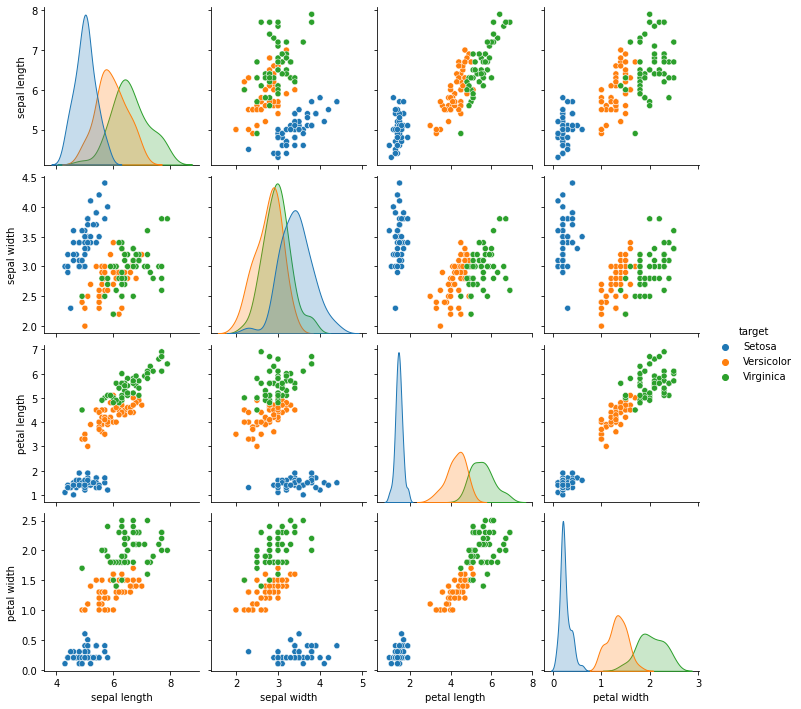

In [ ]:
# Plot histograma
sns.pairplot(data=df, hue="target")

Qual a conclusão que se chega ao olhar para o gráfico?

A classe setosa possui um padrão que se diferencia das outras classes

#### Qual a média dos atributos para cada target

##### **Gráfico de barras**
##### Para dados de séries não temporais rotulados

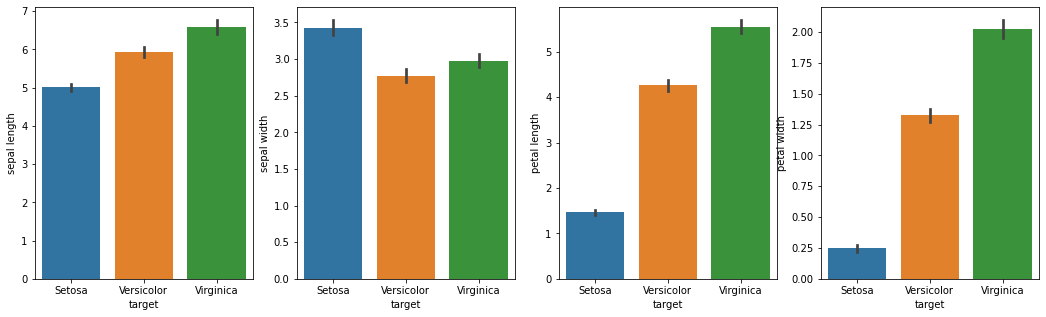

In [ ]:
# Plot com a média para cada atributo separado pelas classes Setosa, Versicolor, Virginica
fig, (axis1, axis2, axis3, axis4) = plt.subplots(1,4, figsize=(18,5))

sns.barplot(x='target', y='sepal length', data=df, ax=axis1)
sns.barplot(x='target', y='sepal width', data=df, ax=axis2)
sns.barplot(x='target', y='petal length', data=df, ax=axis3)
sns.barplot(x='target', y='petal width', data=df, ax=axis4)

Qual a conclusão que se chega ao olhar para o gráfico

A classe Setosa (0) possui forte característica que a difere das demais classes.



#### Heatmap - Olhando para a correlação entre os atributos



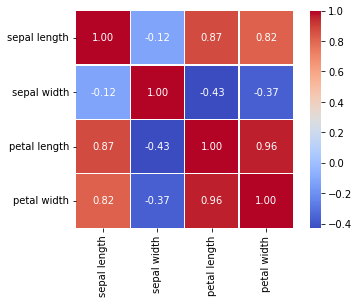

In [ ]:
# Plot heatmap
sns.heatmap(df.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1, vmax=1.0,
            square=True, linecolor='white', annot=True)

Que conclusão chegamos?

petal width e petal length e sepal length tem forte correlação positiva

petal length e sepal width tem forte correlação negativa com a sepal width

Nessa visualização deduzimos que o atributo petal length tem forte correlação com todos os outros atributos, ou seja só ele acumularia informação que separa as classes alvos.

# **Preparação de Dados**

### Limpeza e Pré-processamento

#### Identificação de registros ausentes e duplicados

In [ ]:
# contando a quantidade de valores ausentes por coluna:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
target          0
dtype: int64

In [ ]:
# contando a quantidade total de valores NaN (not a number)
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
target          0
dtype: int64

In [ ]:
# contando a quantidade de duplicados
df.shape[0] - df.drop_duplicates().shape[0]

1

#### Tratando valores faltantes e duplicados



In [ ]:
# Remover dados duplicados
df.drop_duplicates(inplace=True)

### Transformação de dados

#### Transformação dos atributos para os modelos de Machine Learning


In [ ]:
# Converter Classe para numérico (Setosa - 0, Versicolor - 1, Virginica - 2)
df.target = df.target.map({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})

In [ ]:
df.head()## Transformação

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Redução de dimensionalidade usando a **Principal Component Analysis (PCA)**


In [ ]:
from sklearn.decomposition import PCA

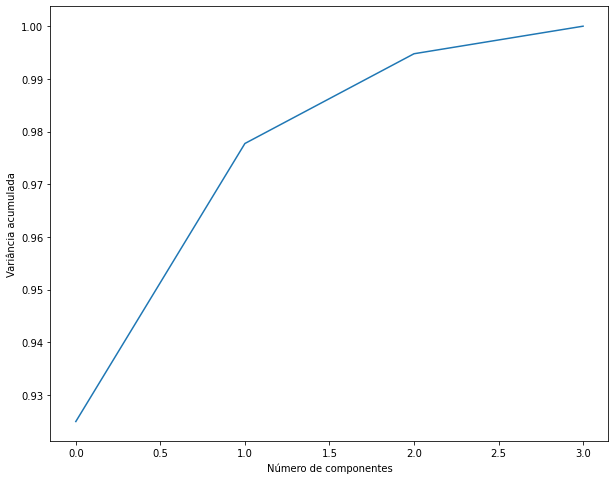

In [ ]:
# Visualizando a variância acumulada do PCA para os Dados Iris
def plot_variancia_acumulada(pca):
    plt.figure(figsize=(10,8))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Número de componentes')
    plt.ylabel('Variância acumulada');

X = df.drop(columns=['target'])
y = df[['target']]

pca = PCA().fit(X)
plot_variancia_acumulada(pca)

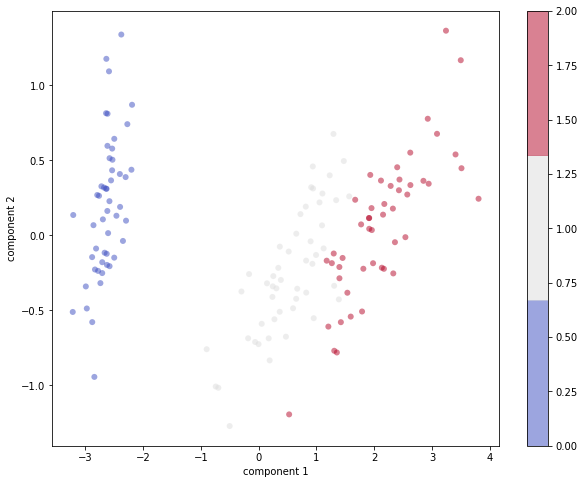

In [ ]:
# Aplicando PCA nos dados Iris

def plot_pca(df_pca, y):
    plt.figure(figsize=(10,8))
    plt.scatter(df_pca[:, 0], df_pca[:, 1],
                c=y.values, edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('coolwarm', 3))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar();

pca = PCA(2)
df_pca = pca.fit_transform(X)
plot_pca(df_pca, y)

#### Preparando datasets de treino e teste usando o Sklearn (holdout)

In [ ]:
# dividir os dados onde 80% para train e 20% para test
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target']).copy()

y = df.target

X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.8)

In [ ]:
# Print tamanho das bases de treino e teste
print('X1 - Treino:', X1.shape[0])
print('y1 - Treino:', y1.shape[0])
print('X2 - Teste:', X2.shape[0])
print('y2 - Teste:', y2.shape[0])

X1 - Treino: 119
y1 - Treino: 119
X2 - Teste: 30
y2 - Teste: 30


# **Construção do Modelo**

Supervisionado
*   Logistic Regression
*   K- vizinhos - K-NN
*   Árvore de Decisão - Decision Tree

Não-supervisionado
*   K-means


## Modelo de Logistic Regression (LR)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Treinamento do Logistic Regression usando dados de X1 e y1 
lr_model = LogisticRegression(random_state=0, solver='liblinear')
lr_model.fit(X1, y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Print a acurácia do modelo treinado
acc_linReg = round(lr_model.score(X1, y1)*100, 2)
print('Acurácia do modelo de Regressão Linear: {}'.format(acc_linReg))

Acurácia do modelo de Regressão Linear: 95.8


## Modelo de K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Treinamento do KNN usando dados de X1 e y1 
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X1, y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
# print a acurácia do modelo treinado
acc_knn = round(knn_model.score(X1, y1)*100, 2)
print('Acurácia do modelo de KNN: {}'.format(acc_knn))

Acurácia do modelo de KNN: 98.32


## Modelo de Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Treinamento do Decision Tree usando dados de X1 e y1 
dt_model = DecisionTreeClassifier(random_state=0, max_depth=2)
dt_model.fit(X1, y1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
from sklearn import tree

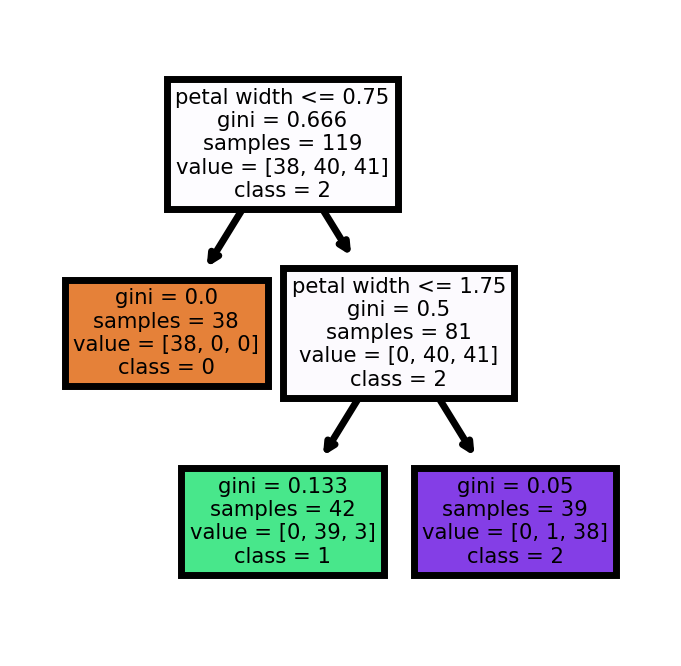

In [ ]:
# Imprimindo a Árvore gerada no treinamento
fn=X1.columns
cn=['0','1', '2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (1.5,1.5), dpi=500)
tree.plot_tree(dt_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

fig.savefig('dt_tree.png')

In [ ]:
# print a acurácia do modelo treinado
acc_dt = round(dt_model.score(X1, y1)*100, 2)
print('Acurácia do modelo de DT: {}'.format(acc_dt))

Acurácia do modelo de DT: 96.64


## Modelo de K-means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Treinamento do KMeans com k=3 usando dados de X1 e y1 
km_model = KMeans(n_clusters=3, random_state=1234)
km_model.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [ ]:
# print a acurácia do modelo treinado
from sklearn.metrics import accuracy_score
acc_km = round(accuracy_score(y1, km_model.predict(X1))*100,2)
print('Acurácia do modelo de KM: {}'.format(acc_km))

Acurácia do modelo de KM: 44.54


In [ ]:
# Printando os centróides
pd.DataFrame(km_model.cluster_centers_, columns=X1.columns)

,sepal length,sepal width,petal length,petal width
0,5.021053,3.400000,1.457895,0.231579
1,6.884375,3.112500,5.687500,2.037500
2,5.904082,2.736735,4.381633,1.451020


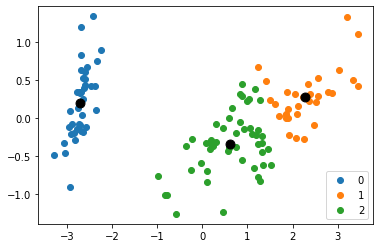

In [ ]:
# Função para visualizar os grupos encontrados pelo KMeans usando o PCA
from sklearn.decomposition import PCA
import numpy as np
 
def plot_kmeans(data, pca, km_model):
    
    #Transforma os dados
    km_view = pca.fit_transform(data)
    
    #prediz os labels dos grupos.
    label = km_model.predict(data)
    
    #Obtendo os labels únicos
    u_labels = np.unique(label)
    
    #Plotando os resultados:
    for i in u_labels:
        plt.scatter(km_view[label == i , 0] , km_view[label == i , 1] , label = i)

    centroids = pca.transform(km_model.cluster_centers_)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')

    plt.legend()
    plt.show()

pca = PCA(2, random_state=0)
plot_kmeans(X1, pca, km_model)

# **Avaliação de Resultados**

## Matriz de Confusão

In [ ]:
from sklearn import metrics

In [ ]:
# print matriz de confusão para um dos modelos criados
metrics.confusion_matrix(y2, dt_model.predict(X2))

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  6]])

## Métricas de Avaliação de resultados

In [ ]:
# Fazer predicao para todos os modelos criados para a base X2
results_dt = dt_model.predict(X2)
results_knn = knn_model.predict(X2)
results_lr = lr_model.predict(X2)
results_km = km_model.predict(X2)

### Resultados Logistic Regression 

In [ ]:
# métricas 
print(metrics.classification_report(y2,results_lr,target_names=['0', '1', '2'], digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      1.000     0.700     0.824        10
           2      0.727     1.000     0.842         8

    accuracy                          0.900        30
   macro avg      0.909     0.900     0.889        30
weighted avg      0.927     0.900     0.899        30



### Resultados KNN

In [ ]:
# métricas
print(metrics.classification_report(y2,results_knn,target_names=['0', '1', '2'], digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      0.833     1.000     0.909        10
           2      1.000     0.750     0.857         8

    accuracy                          0.933        30
   macro avg      0.944     0.917     0.922        30
weighted avg      0.944     0.933     0.932        30



### Resultados Decision Tree 

In [ ]:
# métricas
print(metrics.classification_report(y2,results_dt,target_names=['0', '1', '2'], digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      0.833     1.000     0.909        10
           2      1.000     0.750     0.857         8

    accuracy                          0.933        30
   macro avg      0.944     0.917     0.922        30
weighted avg      0.944     0.933     0.932        30



### Resultados KMeans 

In [ ]:
# métricas
print(metrics.classification_report(y2,results_km,target_names=['0', '1', '2'], digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      0.000     0.000     0.000        10
           2      0.091     0.125     0.105         8

    accuracy                          0.433        30
   macro avg      0.364     0.375     0.368        30
weighted avg      0.424     0.433     0.428        30



### Visão geral dos resultados

In [ ]:
# Visualizar todas as métricas em uma tabela
results_dt = dt_model.predict(X2)
results_knn = knn_model.predict(X2)
results_lr = lr_model.predict(X2)
results_km = km_model.predict(X2)

cols = ['Modelo', 'Precisão', 'Recall', 'F1-Score', 'Acurácia']
models = ['LR', 'KNN', 'DT', 'KM']
results = [results_lr, results_knn, results_dt, results_km]

df_result = pd.DataFrame(columns=cols, index=range(0,4))

for m,r,i in zip(models, results, range(0,4)):
    df_result.loc[i] = [m, 
                        metrics.precision_score(y2, r, average='weighted'),
                        metrics.recall_score(y2, r, average='weighted'),
                        metrics.f1_score(y2, r, average='weighted'),
                        metrics.accuracy_score(y2, r)]
df_result

,Modelo,Precisão,Recall,F1-Score,Acurácia
0,LR,0.927273,0.9,0.899071,0.9
1,KNN,0.944444,0.933333,0.931602,0.933333
2,DT,0.944444,0.933333,0.931602,0.933333
3,KM,0.424242,0.433333,0.42807,0.433333


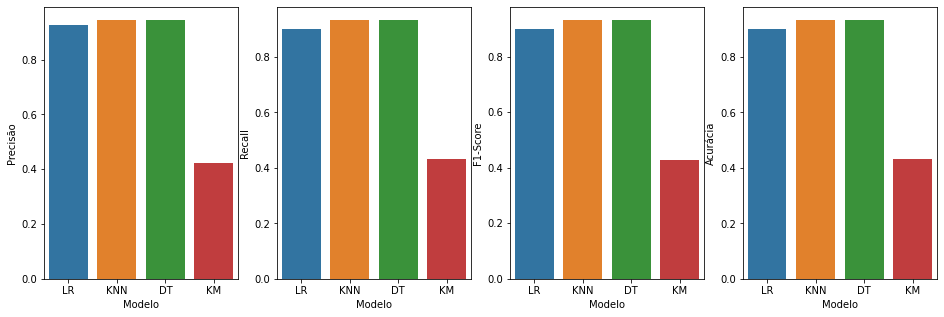

In [ ]:
# Plot para as métricas de Precisão Recall F1-Score e Acurácia para todos os modelos
fig, (axis1, axis2, axis3, axis4) = plt.subplots(1,4, figsize=(16,5))

sns.barplot(x='Modelo', y='Precisão', data=df_result, ax=axis1)
sns.barplot(x='Modelo', y='Recall', data=df_result, ax=axis2)
sns.barplot(x='Modelo', y='F1-Score', data=df_result, ax=axis3)
sns.barplot(x='Modelo', y='Acurácia', data=df_result, ax=axis4);